In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

This notebook focuses on Unsupervied Learning. We are exploring if there are any patterns among states and territories when analyzing various hate crime bias.  
The unnamed column in the dataset was removed due to it not being relevant.   

In [2]:
combined_df = pd.read_csv('crime_politics.csv')
combined_df

,Unnamed: 0,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,...,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,111023,2020,WY,West,5,2020-11-29,6,White,2,Intimidation,...,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219573,111024,2020,WY,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,...,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219574,111025,2020,WY,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219575,111026,2020,WY,West,5,2020-01-30,1,White,1,Simple Assault,...,Anti-Female,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [3]:
combined_df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'REGION_NAME',
       'POPULATION_GROUP_CODE', 'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT',
       'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME',
       'BIAS_DESC', 'VICTIM_TYPES', 'CONGRESS', 'YEAR_START', 'YEAR_END',
       'HOUSE_MAJORITY', 'SENATE_MAJORITY', 'PRESIDENCY', 'PRESIDENT',
       'PARTY_GOVERNMENT'],
      dtype='object')

In [4]:
combined_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
combined_df.head(10)

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
5,1991,AR,South,3,1991-07-27,1,Black or African American,1,Robbery,Grocery/Supermarket,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
6,1991,AR,South,2,1991-11-14,2,Black or African American,1,Aggravated Assault,School-College/University,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
7,1991,AR,South,3,1991-07-10,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,Residence/Home,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
8,1991,AR,South,3,1991-10-06,2,Black or African American,1,Intimidation,Residence/Home,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
9,1991,AR,South,3,1991-10-04,10,Black or African American,2,Robbery,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided


In [6]:
combined_df.describe()

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,CONGRESS,YEAR_START,YEAR_END
count,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2005.472691,0.955724,1.247567,108.983523,2004.967046,2006.967046
std,8.591466,1.358364,2.274116,4.284975,8.569949,8.569949
min,1991.000000,0.000000,1.000000,102.000000,1991.000000,1993.000000
25%,1998.000000,0.000000,1.000000,105.000000,1997.000000,1999.000000
50%,2005.000000,1.000000,1.000000,109.000000,2005.000000,2007.000000
75%,2013.000000,1.000000,1.000000,113.000000,2013.000000,2015.000000
max,2020.000000,99.000000,900.000000,116.000000,2019.000000,2021.000000


Checking how many different types of biases are in the dataset. We are viewing the count of biases for each state and sorting by the states with the highest counts of bias to least. 

In [7]:
combined_df['BIAS_DESC'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry', 'Anti-Multiple Religions',
       'Anti-Multiple Races, Group', 'Anti-Lesbian (Female)',
       'Anti-Native American', 'Anti-Atheism/Agnosticism',
       'Anti-Bisexual', 'Anti-Physical Disability',
       'Anti-Mental Disability', 'Anti-Transgender',
       'Anti-Gender Non-Conforming',
       'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Female',
       'Anti-Male', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Buddhist', 'Anti-Sikh', 'Anti-Other Christian', 'Anti-Hindu',
       'Anti-Eastern Orthodox (Russian, Greek, Other)',
       'Anti-Other Race/Ethnicity/Ancestry;Anti-Sikh',
       "Unknown (offender's motivation not known)"], dtype=object)

In [8]:
#groupby state and bias description
grouped_states = combined_df.groupby(['STATE_ABBR'])

In [10]:
#total bias count for each state
#bias_states = grouped_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)
state_bias = grouped_states['BIAS_DESC'].count().sort_values(ascending=False)

In [12]:
#convert to dataframe
state_bias = pd.DataFrame(state_bias)
state_bias

,BIAS_DESC
STATE_ABBR,
CA,36235
NJ,20960
NY,20006
MI,12229
MA,11178
OH,9051
TX,8483
WA,8472
AZ,6764


In [13]:
#reset index
state_bias_df = state_bias.reset_index()
state_bias_df

,STATE_ABBR,BIAS_DESC
0,CA,36235
1,NJ,20960
2,NY,20006
3,MI,12229
4,MA,11178
5,OH,9051
6,TX,8483
7,WA,8472
8,AZ,6764
9,MD,5682


Text(0, 0.5, 'Total Bias Count')

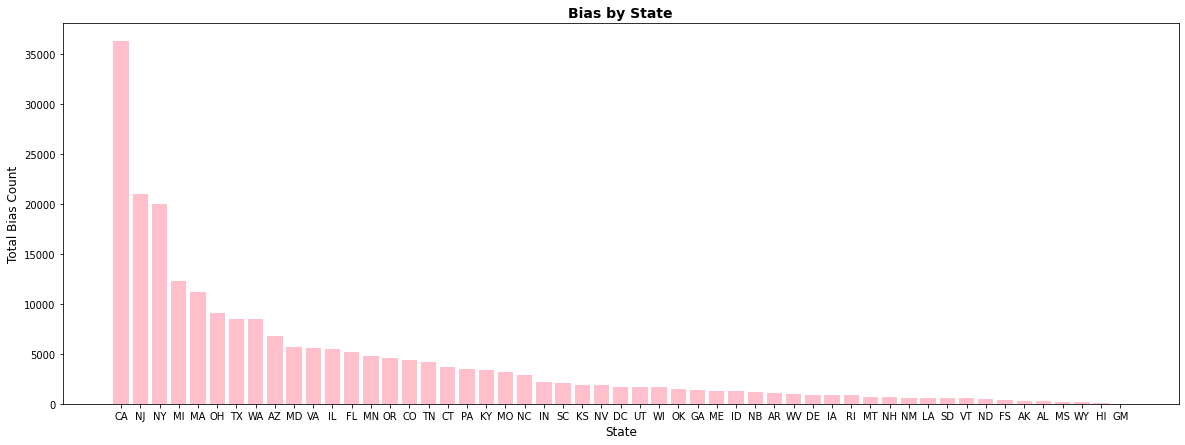

In [14]:
#visualize
state = state_bias_df['STATE_ABBR']
crime = state_bias_df['BIAS_DESC']

plt.figure(figsize=(20,7))

#plot the graph
bar_chart  = plt.bar(state, crime, color ='pink', align = 'center')
plt.title('Bias by State', fontsize = 14, fontweight = 'bold')
plt.xlabel('State', fontsize = 12)
plt.ylabel('Total Bias Count', fontsize = 12)

In [15]:
#add total victim count
state_offender_count = grouped_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)

In [16]:
offender_df = pd.DataFrame(state_offender_count)
offender_df

,TOTAL_OFFENDER_COUNT
STATE_ABBR,
CA,39261
NY,12310
MI,11735
TX,10192
NJ,9813
MA,9539
OH,9127
WA,8324
IL,8063


In [17]:
offender_df1 = offender_df.reset_index()
offender_df1

,STATE_ABBR,TOTAL_OFFENDER_COUNT
0,CA,39261
1,NY,12310
2,MI,11735
3,TX,10192
4,NJ,9813
5,MA,9539
6,OH,9127
7,WA,8324
8,IL,8063
9,FL,6734


In [21]:
biases = state_bias_df['BIAS_DESC']
bias_list = biases.to_list()

In [22]:
df2 = offender_df1.assign(Bias_Count=bias_list)
df2

,STATE_ABBR,TOTAL_OFFENDER_COUNT,Bias_Count
0,CA,39261,36235
1,NY,12310,20960
2,MI,11735,20006
3,TX,10192,12229
4,NJ,9813,11178
5,MA,9539,9051
6,OH,9127,8483
7,WA,8324,8472
8,IL,8063,6764
9,FL,6734,5682


### Include frequency of incidents by state

In [23]:
combined_df['INCIDENT_COUNT'] = 1

In [24]:
#group incidents by year
#total number of incidents per year
#total number offenders and victims
#aggregate incident count by year and groupby state

state_sums = combined_df.groupby(['STATE_ABBR']).sum().reset_index()
hc_by_state = state_sums.drop(['CONGRESS', 'YEAR_START', 'YEAR_END', 'DATA_YEAR'], axis=1)
hc_by_state

,STATE_ABBR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT
0,AK,360,305,237
1,AL,200,270,231
2,AR,1285,1355,1119
3,AZ,6448,9037,6764
4,CA,39261,46685,36235
5,CO,5117,5891,4341
6,CT,2947,4891,3658
7,DC,2206,1972,1710
8,DE,736,1207,927
9,FL,6734,6208,5185


In [25]:
state_df = hc_by_state.assign(BIAS_COUNT=bias_list)

#rename the columns
state_df.rename(columns ={'STATE_ABBR': 'State',
                         'TOTAL_OFFENDER_COUNT': 'Offenders',
                         'VICTIM_COUNT': 'Victims',
                         'INCIDENT_COUNT': 'Incidents',
                         'BIAS_COUNT': 'Bias'}, inplace=True)
state_df.head()

,State,Offenders,Victims,Incidents,Bias
0,AK,360,305,237,36235
1,AL,200,270,231,20960
2,AR,1285,1355,1119,20006
3,AZ,6448,9037,6764,12229
4,CA,39261,46685,36235,11178


In [26]:
state_df.describe()

,Offenders,Victims,Incidents,Bias
count,53.000000,53.000000,53.000000,53.000000
mean,3959.528302,5168.622642,4142.962264,4142.962264
std,5963.920412,7717.634473,6331.994995,6331.994995
min,16.000000,11.000000,5.000000,5.000000
25%,703.000000,1050.000000,696.000000,696.000000
50%,2043.000000,2292.000000,1710.000000,1710.000000
75%,5103.000000,5957.000000,4738.000000,4738.000000
max,39261.000000,46685.000000,36235.000000,36235.000000


### KMeans Clustering: normalizing

In [27]:
X = state_df.drop('State', axis=1)
y = state_df['State']

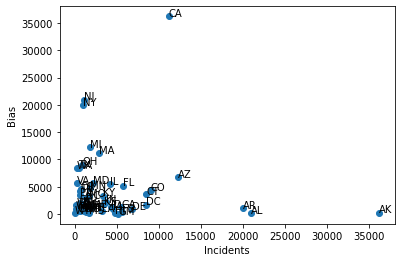

In [28]:
plt.scatter(X['Bias'], X['Incidents'])

#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Bias'][i], X['Incidents'][i]))
    
plt.xlabel('Incidents')
plt.ylabel('Bias')
plt.show()

In [29]:
X

,Offenders,Victims,Incidents,Bias
0,360,305,237,36235
1,200,270,231,20960
2,1285,1355,1119,20006
3,6448,9037,6764,12229
4,39261,46685,36235,11178
5,5117,5891,4341,9051
6,2947,4891,3658,8483
7,2206,1972,1710,8472
8,736,1207,927,6764
9,6734,6208,5185,5682


In [30]:
#instatiate normalizer
norm = Normalizer()
#fit normalizer to data
X_norm = norm.fit_transform(X)

In [31]:
#convert back to dataframe
norm_df  = pd.DataFrame(X_norm, columns = ["Offenders", "Victims", "Incidents", "Bias"])
norm_df

,Offenders,Victims,Incidents,Bias
0,0.009934,0.008416,0.006540,0.999894
1,0.009540,0.012879,0.011019,0.999811
2,0.063854,0.067332,0.055605,0.994131
3,0.361277,0.506337,0.378982,0.685182
4,0.546620,0.649982,0.504490,0.155628
5,0.402461,0.463338,0.341428,0.711878
6,0.271352,0.450350,0.336819,0.781092
7,0.241480,0.215865,0.187186,0.927389
8,0.105564,0.173120,0.132959,0.970159
9,0.563016,0.519039,0.433508,0.475061


### Clustering

In [32]:
inertias = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k)
    model.fit(X_norm)
    inertia = model.inertia_
    inertias.append(inertia)

In [33]:
print(inertia)

0.2898942442561029


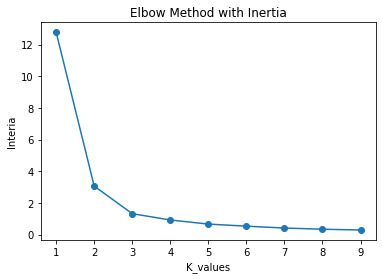

In [34]:
#plot the inerias with the k-values
#inertia measures how spread out the clusters are (lower is better)
#measures how far samples are from their centroids

plt.plot(range(1,10), inertias,  '-o')
plt.xlabel('K_values')
plt.ylabel('Interia')
plt.title("Elbow Method with Inertia")
plt.show()

The optimized number of clusters is 3

In [35]:
#create the kmeans model with 3 clusters
model = KMeans(n_clusters=3)

#fit the model
model.fit(X_norm)

#predict method on X_norm
labels = model.predict(X_norm)

In [36]:
print(labels)

[2 2 2 1 0 1 1 2 2 1 2 2 2 2 2 1 0 1 1 1 2 0 0 1 0 0 0 2 1 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


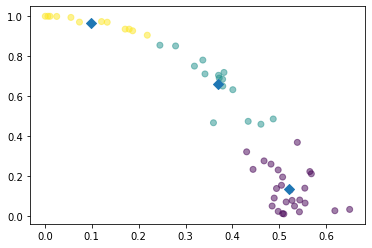

In [37]:
#assign the columns of X: xs and ys
xs = X_norm[:, 2]
ys = X_norm[:, 3]

# make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha = 0.5)

#cluster the centroids for the values
centroids = model.cluster_centers_

#get the centroids for the values
centroid_x = centroids[:,2]
centroid_y = centroids[:,3]

#make scatter plot
plt.scatter(centroid_x, centroid_y, marker='D', s=50)
plt.show()

## Agglomerative Clustering

In [38]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_norm)

array([0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

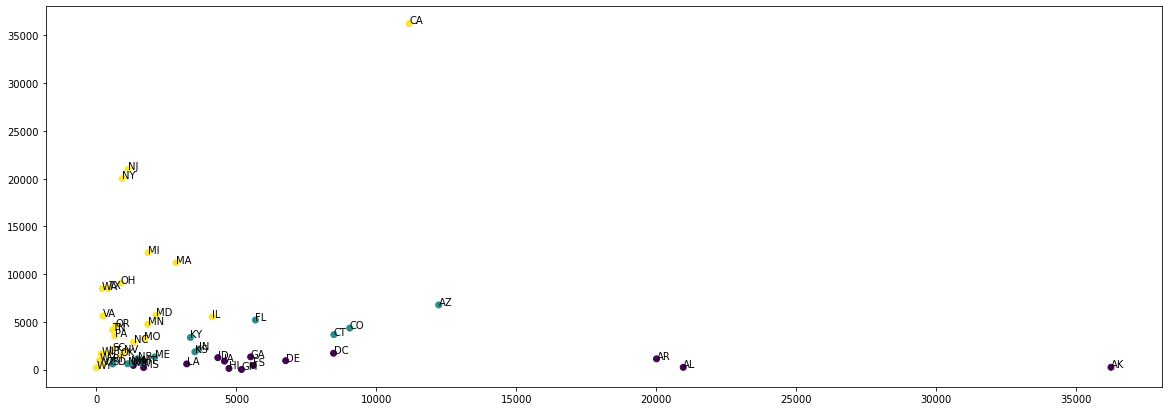

In [39]:
plt.figure(figsize=(20,7))
plt.scatter(X['Bias'], X['Incidents'], c = cluster.labels_)

#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Bias'][i], X['Incidents'][i]))

## Hierarchical Clustering

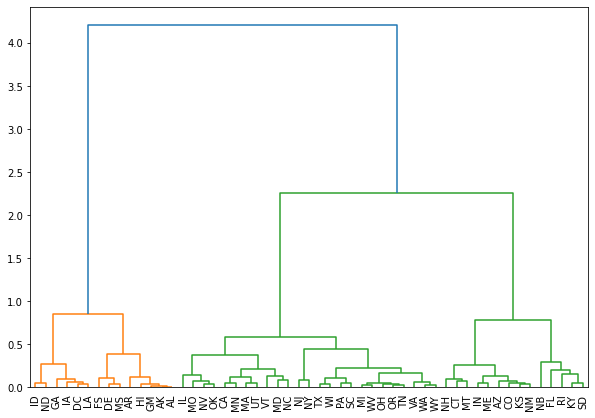

In [40]:
linked = linkage(X_norm, 'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked, labels=list(y), leaf_font_size=10)
plt.show()

# Checking if there are any patterns among states when we narrow the focus on Anti-Black bias since that is consistently the highest bias when exploring the data

In [41]:
Anti_Black_df = combined_df[combined_df["BIAS_DESC"] == 'Anti-Black or African American']
Anti_Black_df

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,...,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT,INCIDENT_COUNT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
11,1991,AR,South,8D,1991-10-14,1,White,1,Intimidation,School-College/University,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
12,1991,AZ,West,1B,1991-01-15,0,Unknown,1,Intimidation,Residence/Home,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
15,1991,AZ,West,1B,1991-02-04,1,White,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219561,2020,WY,West,4,2020-07-06,0,Unknown,1,Destruction/Damage/Vandalism of Property,Highway/Road/Alley/Street/Sidewalk,...,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided,1
219563,2020,WY,West,3,2020-06-27,0,Unknown,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,...,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided,1
219567,2020,WY,West,5,2020-02-23,2,White,1,Intimidation,Park/Playground,...,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided,1
219569,2020,WY,West,5,2020-08-24,1,White,2,Aggravated Assault,Hotel/Motel/Etc.,...,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided,1


In [47]:
#groupby state and Anti-black bias description
grouped_states = Anti_Black_df.groupby(['STATE_ABBR'])
black_bias_states = grouped_states['BIAS_DESC'].count().sort_values(ascending=False)

#convert to dataframe
black_bias_states = pd.DataFrame(black_bias_states)

#reset index
black_bias_df = black_bias_states.reset_index()
black_bias_df

,STATE_ABBR,BIAS_DESC
0,CA,11325
1,NJ,8099
2,MI,4693
3,NY,4450
4,MA,3501
5,OH,3278
6,TX,3109
7,MD,2776
8,WA,2771
9,AZ,2337


Text(0, 0.5, 'Total Anti-Black Bias Count')

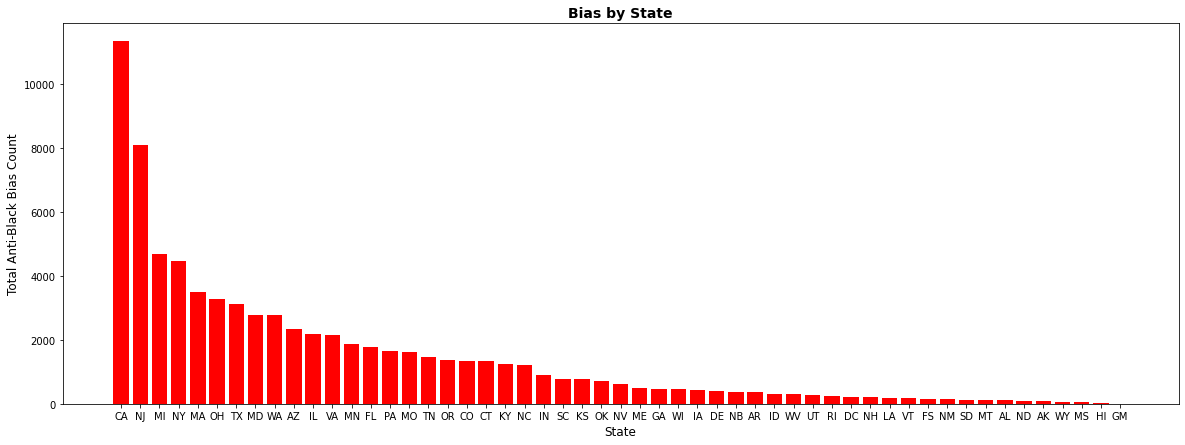

In [49]:
#visualize
states = black_bias_df['STATE_ABBR']
crimes = black_bias_df['BIAS_DESC']

plt.figure(figsize=(20,7))

#plot the graph
bar_chart  = plt.bar(states, crimes, color ='red', align = 'center')
plt.title('Bias by State', fontsize = 14, fontweight = 'bold')
plt.xlabel('State', fontsize = 12)
plt.ylabel('Total Anti-Black Bias Count', fontsize = 12)

In [50]:
Anti_Black_df['INCIDENT_COUNT'] = 1

In [51]:
stategrouped = Anti_Black_df.groupby(['STATE_ABBR']).sum().reset_index()
by_state = stategrouped.drop(['CONGRESS', 'YEAR_START', 'YEAR_END', 'DATA_YEAR'], axis=1)
by_state

,STATE_ABBR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT
0,AK,101,121,86
1,AL,85,128,108
2,AR,440,464,369
3,AZ,2321,3100,2337
4,CA,13253,14689,11325
5,CO,1600,1846,1348
6,CT,1150,1796,1331
7,DC,177,237,218
8,DE,323,554,413
9,FL,2125,2107,1788


In [55]:
bias = black_bias_df['BIAS_DESC']
bias_list2 = bias.to_list()

black_bias = by_state.assign(BIAS_COUNT=bias_list2)

#rename columns
black_bias.rename(columns ={'STATE_ABBR': 'State',
                         'TOTAL_OFFENDER_COUNT': 'Offenders',
                         'VICTIM_COUNT': 'Victims',
                         'INCIDENT_COUNT': 'Incidents',
                         'BIAS_COUNT': 'Bias'}, inplace=True)
black_bias.head()

,State,Offenders,Victims,Incidents,Bias
0,AK,101,121,86,11325
1,AL,85,128,108,8099
2,AR,440,464,369,4693
3,AZ,2321,3100,2337,4450
4,CA,13253,14689,11325,3501


In [56]:
black_bias.describe()

,Offenders,Victims,Incidents,Bias
count,53.000000,53.000000,53.000000,53.000000
mean,1353.981132,1797.320755,1420.113208,1420.113208
std,2036.906955,2519.286856,2052.733465,2052.733465
min,6.000000,1.000000,1.000000,1.000000
25%,177.000000,297.000000,210.000000,210.000000
50%,648.000000,807.000000,610.000000,610.000000
75%,1899.000000,2318.000000,1788.000000,1788.000000
max,13253.000000,14689.000000,11325.000000,11325.000000


## Normalize and KMeans

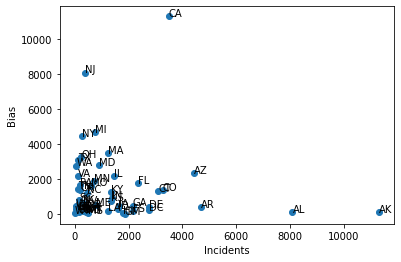

In [58]:
X1 = black_bias.drop('State', axis=1)
y1 = black_bias['State']

#create scatter plot
plt.scatter(X1['Bias'], X1['Incidents'])
#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X1['Bias'][i], X1['Incidents'][i]))
    
plt.xlabel('Incidents')
plt.ylabel('Bias')
plt.show()

In [60]:
#instatiate normalizer
norm = Normalizer()

#fit normalizer to data
X1_norm = norm.fit_transform(X1)

#convert back to dataframe
norm_df1  = pd.DataFrame(X1_norm, columns = ["Offenders", "Victims", "Incidents", "Bias"])
norm_df1

,Offenders,Victims,Incidents,Bias
0,0.008917,0.010683,0.007593,0.999874
1,0.010492,0.015800,0.013331,0.999731
2,0.092618,0.097669,0.077672,0.987851
3,0.365790,0.488561,0.368312,0.701321
4,0.574633,0.636896,0.491037,0.151799
5,0.371690,0.428838,0.313149,0.761500
6,0.287630,0.449203,0.332900,0.777601
7,0.063209,0.084636,0.077851,0.991353
8,0.112384,0.192758,0.143699,0.964139
9,0.506332,0.502043,0.426033,0.556846


## Clustering

In [62]:
inertias = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k)
    model.fit(X1_norm)
    inertia = model.inertia_
    inertias.append(inertia)
    
print(inertia)

0.2516668016439137


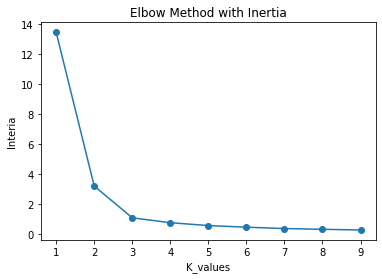

In [63]:
#plot the inerias with the k-values
#inertia measures how spread out the clusters are (lower is better)
#measures how far samples are from their centroids

plt.plot(range(1,10), inertias,  '-o')
plt.xlabel('K_values')
plt.ylabel('Interia')
plt.title("Elbow Method with Inertia")
plt.show()

In [65]:
#create the kmeans model with 3 clusters
model = KMeans(n_clusters=3)

#fit the model
model.fit(X1_norm)

#predict method on X_norm
labels1 = model.predict(X1_norm)
print(labels1)

[1 1 1 2 0 2 2 1 1 2 1 1 1 1 1 1 0 2 2 2 1 0 0 2 0 0 0 1 1 2 0 1 2 0 2 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


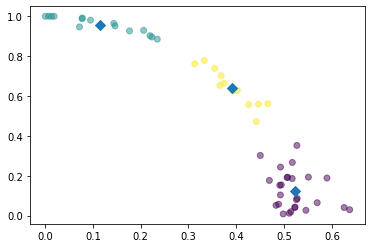

In [66]:
#assign the columns of X: xs and ys
xs1 = X1_norm[:, 2]
ys1 = X1_norm[:, 3]

# make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs1,ys1, c=labels1, alpha = 0.5)

#cluster the centroids for the values
centroids = model.cluster_centers_

#get the centroids for the values
centroid_x1 = centroids[:,2]
centroid_y1 = centroids[:,3]

#make scatter plot
plt.scatter(centroid_x1, centroid_y1, marker='D', s=50)
plt.show()

## Agglomerative Clustering

In [67]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X1_norm)

array([0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

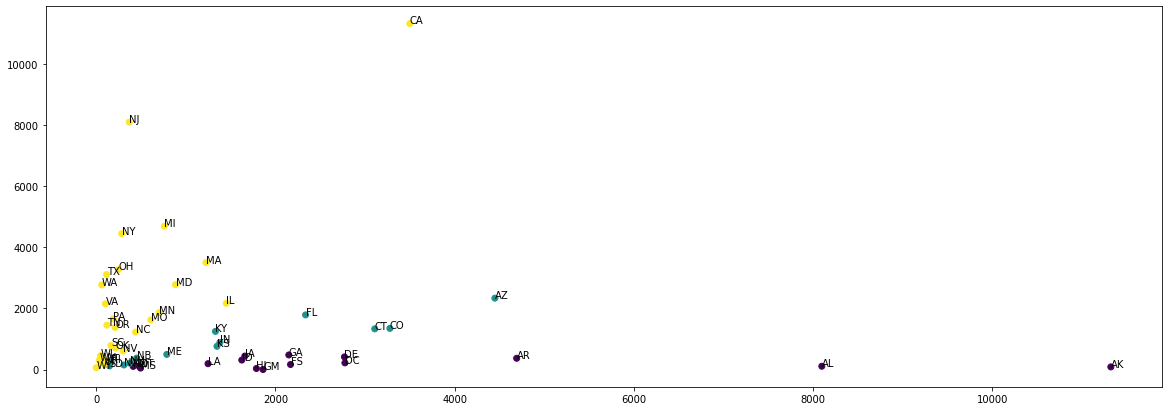

In [68]:
plt.figure(figsize=(20,7))
plt.scatter(X1['Bias'], X1['Incidents'], c = cluster.labels_)

#add labels
for i, txt in enumerate(y1):
    plt.annotate(txt, (X1['Bias'][i], X1['Incidents'][i]))

## Hierarchical Clustering

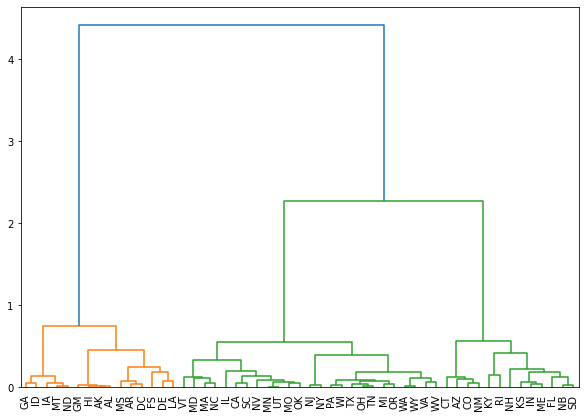

In [69]:
linked = linkage(X1_norm, 'ward')
plt.figure(figsize=(10,7))
plt.xticks(fontsize=16)
dendro = dendrogram(linked, labels=list(y1), leaf_font_size=10)
plt.show()